In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Insurance_Marketing-Customer-Value-Analysis.csv to Insurance_Marketing-Customer-Value-Analysis.csv


In [5]:
data = pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')

In [5]:
data.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/2011,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/2011,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/2011,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/2011,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/2011,Unemployed,M,0,Suburban,Single,77,3,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
data['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

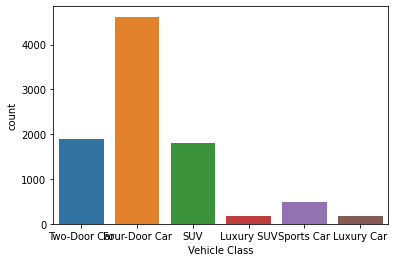

In [7]:
import seaborn as sns
sns.countplot(x = 'Vehicle Class',data = data)

In [9]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


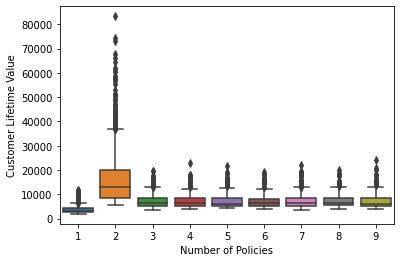

In [251]:
x=data.iloc[:,16]
y=data.iloc[:,2]
ax = sns.boxplot(x, y)

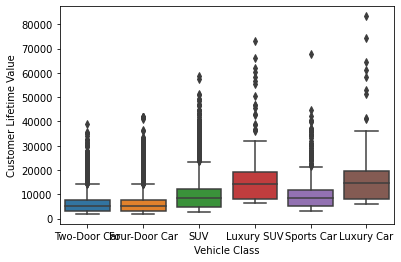

In [250]:
x=data.iloc[:,22]
y=data.iloc[:,2]
ax = sns.boxplot(x, y)

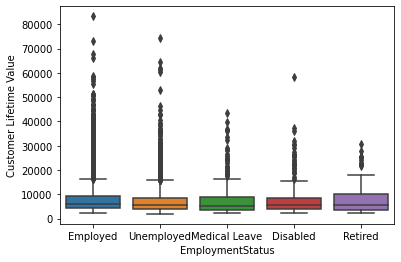

In [9]:
x=data.iloc[:,7]
y=data.iloc[:,2]
ax = sns.boxplot(x, y)

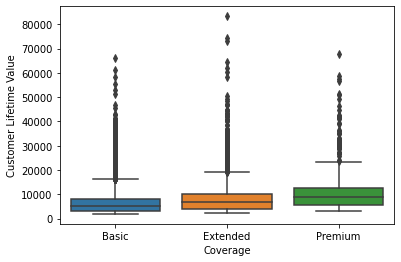

In [11]:
x=data.iloc[:,4]
y=data.iloc[:,2]
ax = sns.boxplot(x, y)

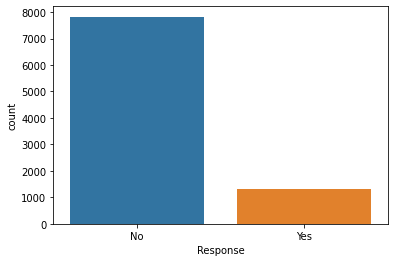

In [14]:
sns.countplot(x = 'Response',data = data)

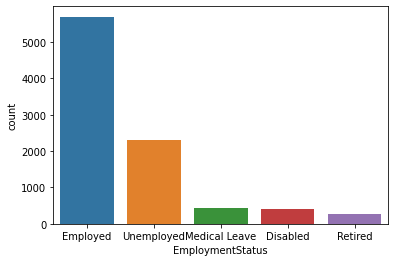

In [17]:
sns.countplot(x = 'EmploymentStatus',data = data)

In [23]:
pd.crosstab(data['Sales Channel'],data['Renew Offer Type'],margins=True)

Renew Offer Type,Offer1,Offer2,Offer3,Offer4,All
Sales Channel,,,,,
Agent,1690,978,518,291,3477
Branch,1099,788,394,286,2567
Call Center,588,647,291,239,1765
Web,375,513,229,208,1325
All,3752,2926,1432,1024,9134


In [64]:
data['Vehicle Class']=data['Vehicle Class'].map({'Four-Door Car' : 1,'Luxury Car' : 2,'Luxury SUV' : 3,'SUV' : 4,'Sports Car' : 5,'Two-Door Car' : 6})
data['State']=data['State'].map({'Arizona' : 1,'California' : 2,'Nevada' : 3,'Oregon' : 4,'Washington' : 5})
data['Response']=data['Response'].map({'No' : 0,'Yes' : 1})
data['Coverage']=data['Coverage'].map({'Basic' : 1,'Extended' : 2,'Premium' : 3})
data['Education']=data['Education'].map({'Bachelor' : 1,'College' : 2,'Doctor' : 3,'High School or Below' : 4,'Master' : 5})
data['Gender']=data['Gender'].map({'F' : 1,'M' : 2})
data['Location Code']=data['Location Code'].map({'Rural' : 1,'Suburban' : 2,'Urban' : 3})
data['EmploymentStatus']=data['EmploymentStatus'].map({'Disabled' : 1,'Employed' : 2,'Medical Leave' : 3,'Retired' : 4,'Unemployed' : 5})
data['Marital Status']=data['Marital Status'].map({'Divorced' : 1,'Married' : 2,'Single' : 3})
data['Policy']=data['Policy'].map({'Corporate L1' : 1,'Corporate L2' : 2,'Corporate L3' : 3,'Personal L1' : 4,'Personal L2' : 5,'Personal L3' : 6,'Special L1' : 7,'Special L2' : 8,'Special L3' : 9})
data['Policy Type']=data['Policy Type'].map({'Corporate Auto' : 1,'Personal Auto' : 2,'Special Auto' : 3})
data['Renew Offer Type']=data['Renew Offer Type'].map({'Offer1' : 1,'Offer2' : 2,'Offer3' : 3,'Offer4' : 4})
data['Vehicle Size']=data['Vehicle Size'].map({'Large' : 1,'Medsize' : 2,'Small' : 3})
data['Sales Channel']=data['Sales Channel'].map({'Agent' : 1,'Branch' : 2,'Call Center' : 3,'Web' : 4})

In [26]:
p=data.iloc[:,1:25]
q=data.iloc[:,2]

In [27]:
del p["Effective To Date"]
del p["Customer Lifetime Value"]
del data["Effective To Date"]
del data['Customer']

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
p[:] = scaler.fit_transform(p[:])


In [212]:
features=["Months Since Last Claim","Income","Number of Policies","Months Since Policy Inception","Customer Lifetime Value"]
clv_data = data[features]
clv_data

,Months Since Last Claim,Income,Number of Policies,Months Since Policy Inception,Customer Lifetime Value
0,32,56274,1,5,2763.519279
1,13,0,8,42,6979.535903
2,18,48767,2,38,12887.431650
3,18,0,7,65,7645.861827
4,12,43836,1,44,2813.692575
...,...,...,...,...,...
9129,18,71941,2,89,23405.987980
9130,14,21604,1,28,3096.511217
9131,9,0,2,37,8163.890428
9132,34,21941,3,3,7524.442436


In [213]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clv_data[:] = scaler.fit_transform(clv_data[:])

In [214]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(clv_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [215]:
pca.explained_variance_ratio_

array([0.26549747, 0.25428876, 0.24021398, 0.21974384, 0.02025595])

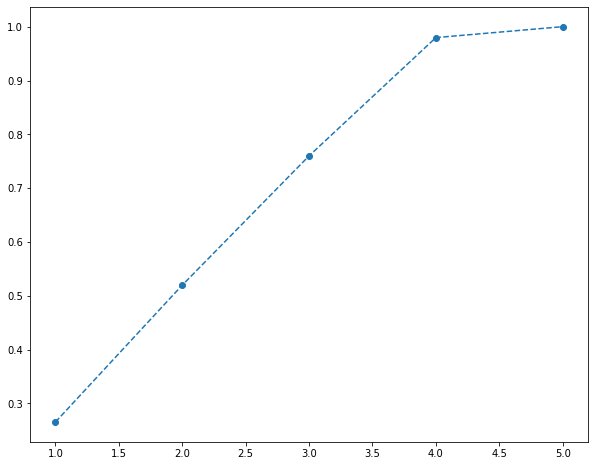

In [216]:
plt.figure(figsize=(10,8))
plt.plot(range(1,6),pca.explained_variance_ratio_.cumsum(),marker ='o',linestyle = '--')

In [227]:
pca = PCA(n_components= 4 )
pca.fit(clv_data)
pca.transform(clv_data)


array([[ 0.07719697, -0.07582572, -0.70441932, -0.09793759],
       [-0.5023846 ,  0.48306683,  0.22750882, -0.08719045],
       [ 0.10518363, -0.05897012, -0.16834437, -0.0355925 ],
       ...,
       [-0.28246967, -0.22470408,  0.13218286, -0.22691407],
       [-0.32223952,  0.06497565, -0.6364747 , -0.1023293 ],
       [-0.16293423, -0.43152849,  0.52368943,  0.1212752 ]])

In [228]:
scores_pca = pca.transform(clv_data)

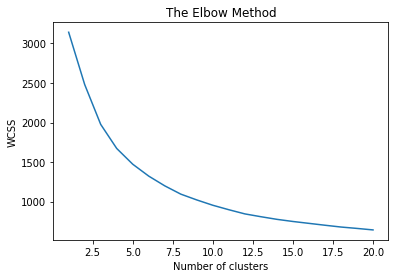

In [229]:
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)

# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [230]:
kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 5, random_state = 0)
Y_Kmeans = kmeans.fit_predict(clv_data)

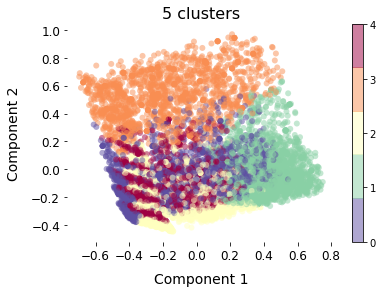

In [231]:

plt.scatter(scores_pca[:, 0], scores_pca[:, 1],
            c=Y_Kmeans, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Spectral_r", 5),
            alpha=0.5)
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('5 clusters', size=16)


plt.colorbar(ticks=[0, 1, 2, 3, 4]);

plt.show()

In [232]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = features)

In [233]:
centroids.index_name = "ClusterID"
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)
centroids

,Months Since Last Claim,Income,Number of Policies,Months Since Policy Inception,Customer Lifetime Value,ClusterID
0,0.807179,0.391760,0.130774,0.487566,0.082103,0
1,0.273709,0.743620,0.134722,0.502694,0.075250,1
2,0.282200,0.170585,0.118006,0.746954,0.077067,2
3,0.446014,0.359120,0.813901,0.476359,0.064063,3
4,0.331243,0.180226,0.130363,0.212805,0.074362,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f306df8bc18>,
      dtype=object)

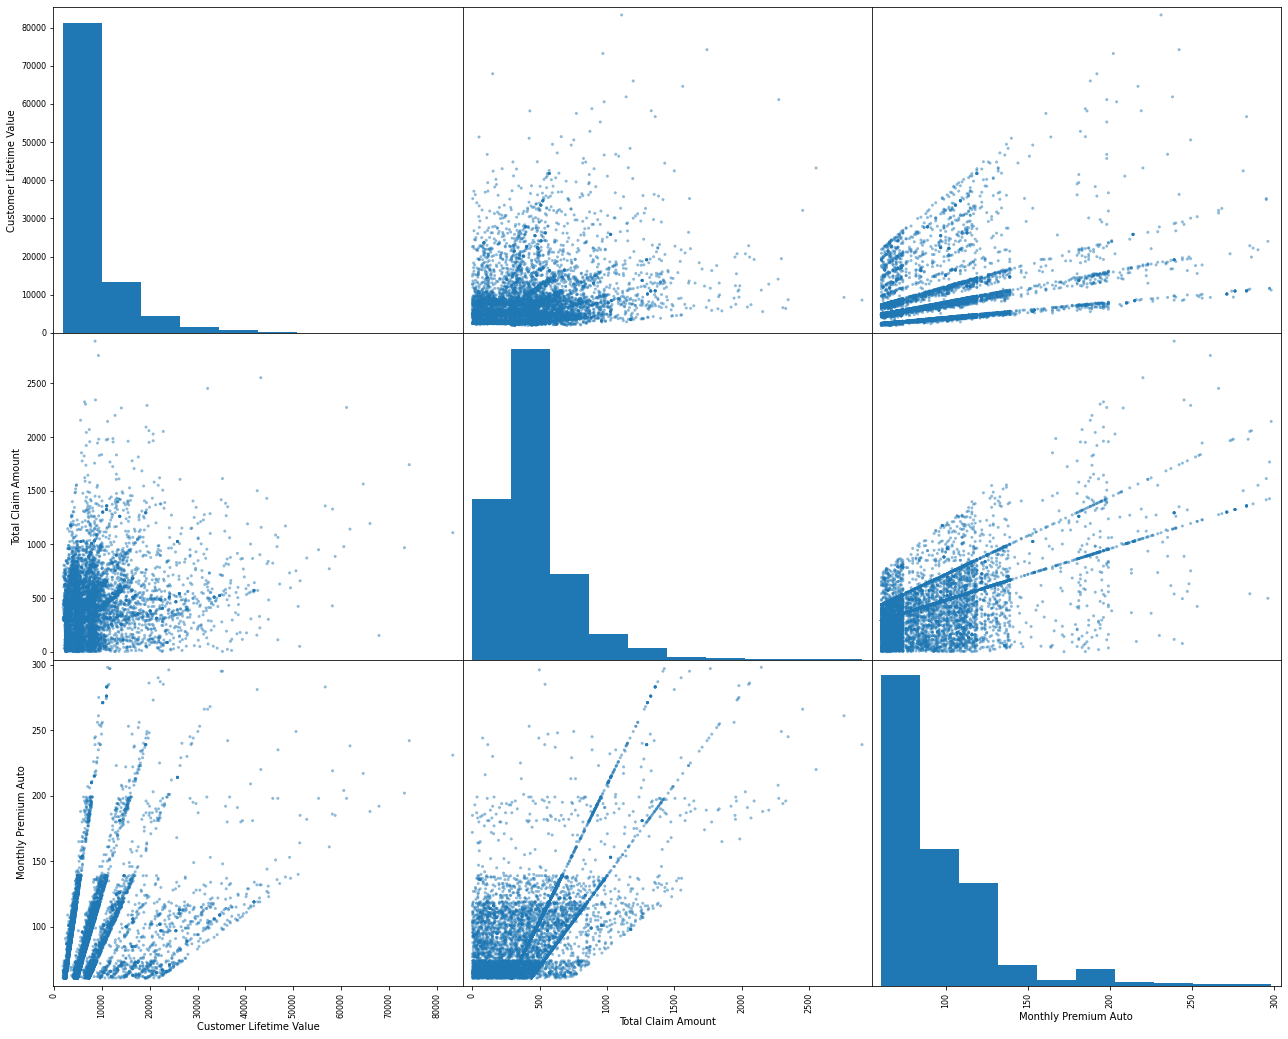

In [ ]:
from pandas.plotting import scatter_matrix
Attributes= ["Customer Lifetime Value","Total Claim Amount","Monthly Premium Auto"]
scatter_matrix(data[Attributes],figsize = (22,18),)

In [ ]:
data['Total Claim Amount'].skew()

1.7149658097209557

In [ ]:
data['Monthly Premium Auto'].skew()

2.1235464499475345

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

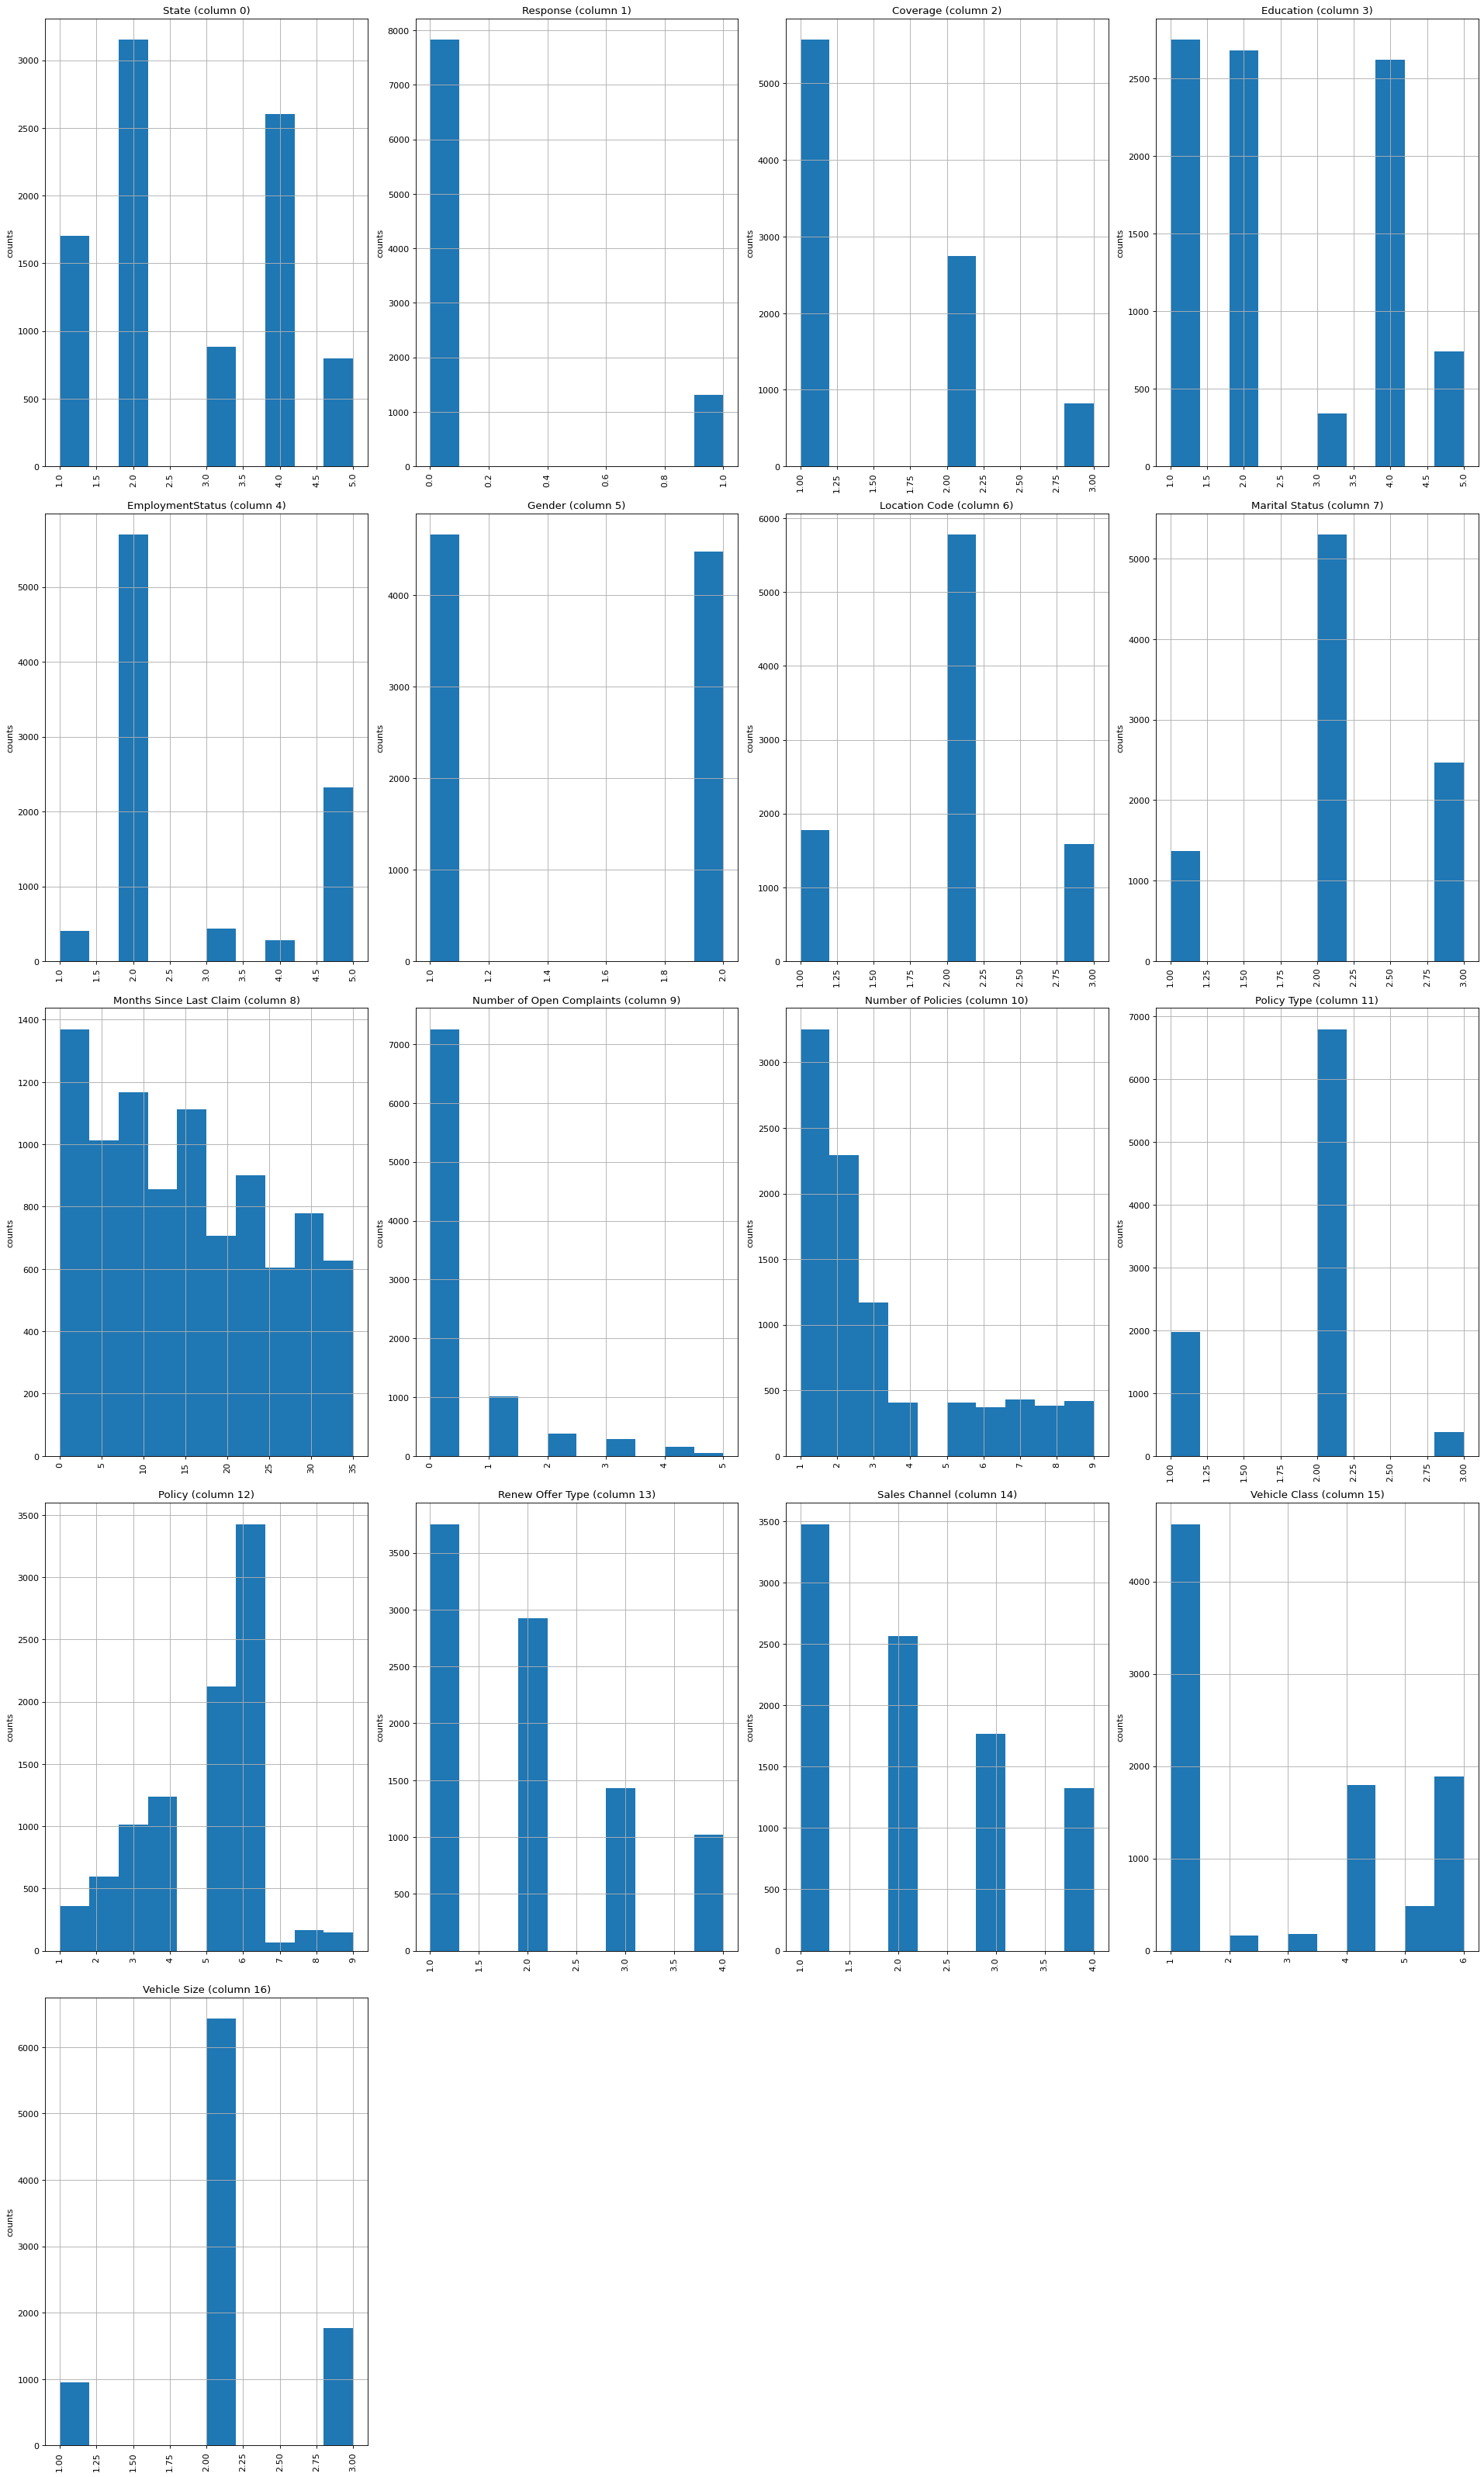

In [ ]:
plotPerColumnDistribution(data,30,4)

In [ ]:
data['Income'].skew()

0.28688727581189166

In [ ]:
p["Monthly Premium Auto"].describe()

count    9134.000000
mean        0.135946
std         0.145181
min         0.000000
25%         0.029536
50%         0.092827
75%         0.202532
max         1.000000
Name: Monthly Premium Auto, dtype: float64

In [ ]:
to_model_columns=p.columns
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(p[to_model_columns])
pred = clf.predict(p[to_model_columns])
p['anomaly']=pred
outliers=p.loc[p['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(p['anomaly'].value_counts())

 1    8038
-1    1096
Name: anomaly, dtype: int64


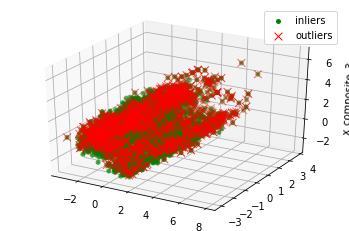

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(p[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=3,label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=1, s=60, marker="x" ,c="red", label="outliers")
ax.legend()
plt.show()

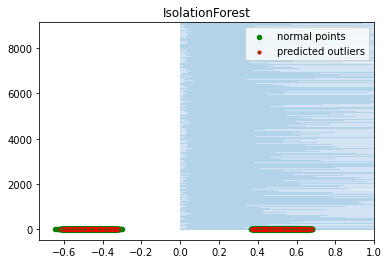

In [ ]:
pca.explained_variance_ratio_


In [ ]:
from feature_selector import FeatureSelector
fs = FeatureSelector(data = p, labels = q)
fs.identify_collinear(correlation_threshold=0.7)

In [ ]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['Income', 'Policy']

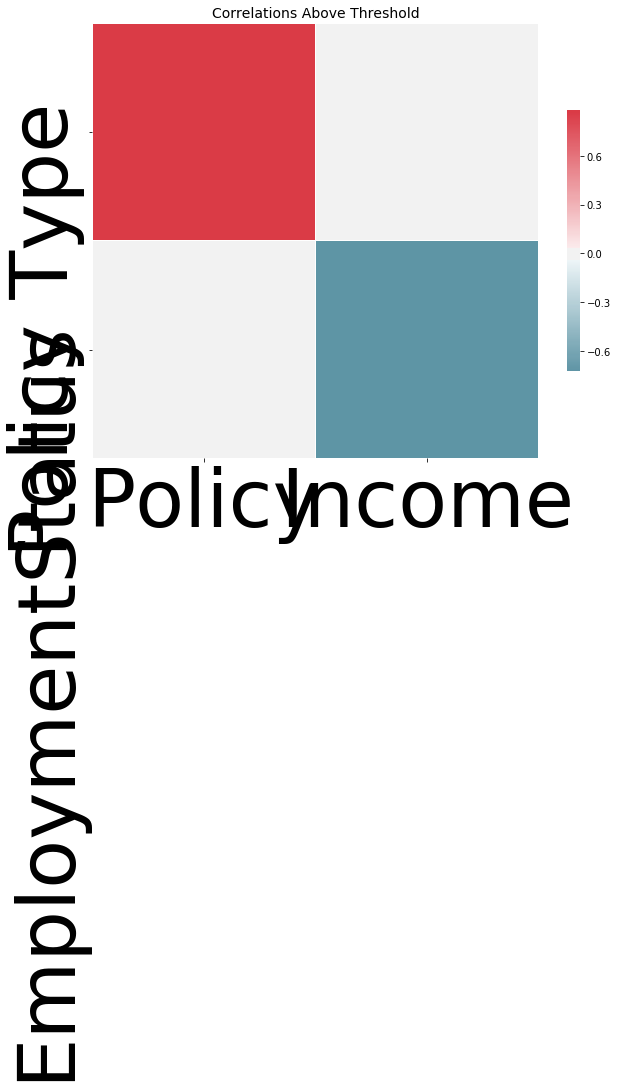

In [ ]:
fs.plot_collinear()

In [ ]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'rmse', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[111]	valid_0's rmse: 3594.99
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[126]	valid_0's rmse: 3970.82
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[150]	valid_0's rmse: 3744.05
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[79]	valid_0's rmse: 3702.93
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[65]	valid_0's rmse: 3418.43
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[90]	valid_0's rmse: 3467.53
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[69]	valid_0's rmse: 3645.15
Training until validation scores don't improve for 100 rounds.
Early stopp

In [ ]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 21 original features
There are 0 one-hot features


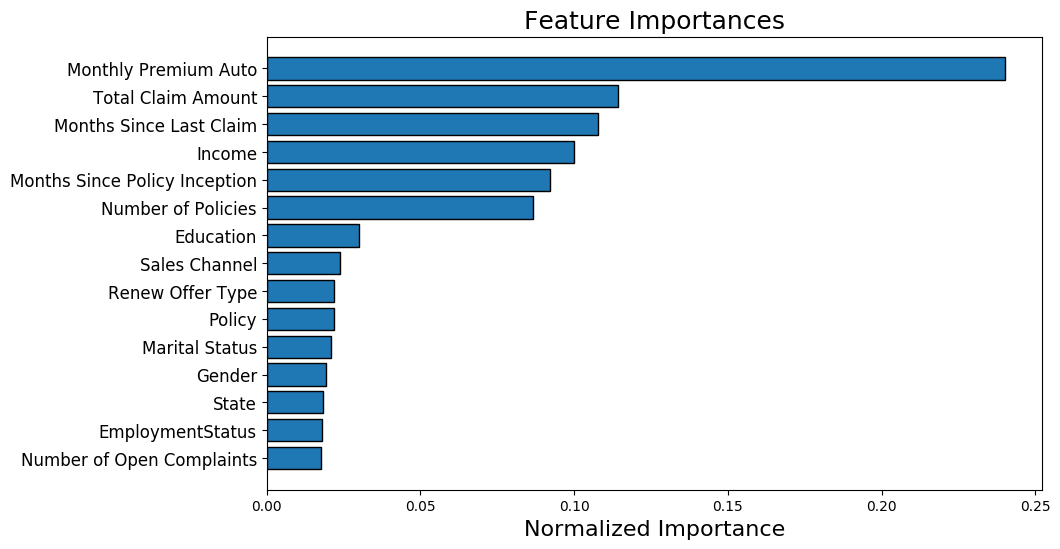

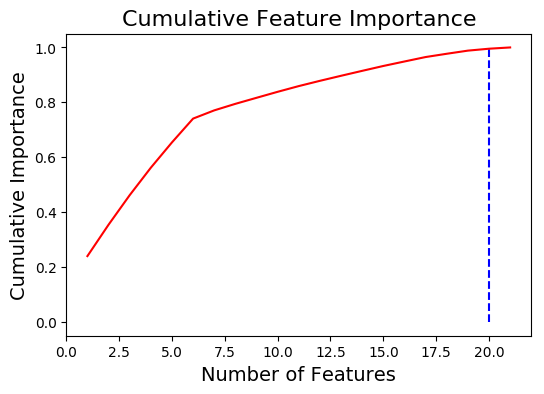

20 features required for 0.99 of cumulative importance


In [ ]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 15)

In [ ]:
fs.feature_importances.head(20)

,feature,importance,normalized_importance,cumulative_importance
0,Monthly Premium Auto,697.8,0.240041,0.240041
1,Total Claim Amount,332.3,0.114310,0.354352
2,Months Since Last Claim,312.9,0.107637,0.461988
3,Income,290.7,0.100000,0.561988
4,Months Since Policy Inception,268.0,0.092191,0.654180
5,Number of Policies,252.0,0.086687,0.740867
6,Education,87.0,0.029928,0.770795
7,Sales Channel,69.2,0.023805,0.794599
8,Renew Offer Type,63.9,0.021981,0.816581
9,Policy,63.5,0.021844,0.838424


[Text(0.5, 0, 'State'),
 Text(1.5, 0, 'Response'),
 Text(2.5, 0, 'Coverage'),
 Text(3.5, 0, 'Education'),
 Text(4.5, 0, 'EmploymentStatus'),
 Text(5.5, 0, 'Gender'),
 Text(6.5, 0, 'Income'),
 Text(7.5, 0, 'Location Code'),
 Text(8.5, 0, 'Marital Status'),
 Text(9.5, 0, 'Monthly Premium Auto'),
 Text(10.5, 0, 'Months Since Last Claim'),
 Text(11.5, 0, 'Months Since Policy Inception'),
 Text(12.5, 0, 'Number of Open Complaints'),
 Text(13.5, 0, 'Number of Policies'),
 Text(14.5, 0, 'Policy Type'),
 Text(15.5, 0, 'Policy'),
 Text(16.5, 0, 'Renew Offer Type'),
 Text(17.5, 0, 'Sales Channel'),
 Text(18.5, 0, 'Total Claim Amount'),
 Text(19.5, 0, 'Vehicle Class'),
 Text(20.5, 0, 'Vehicle Size')]

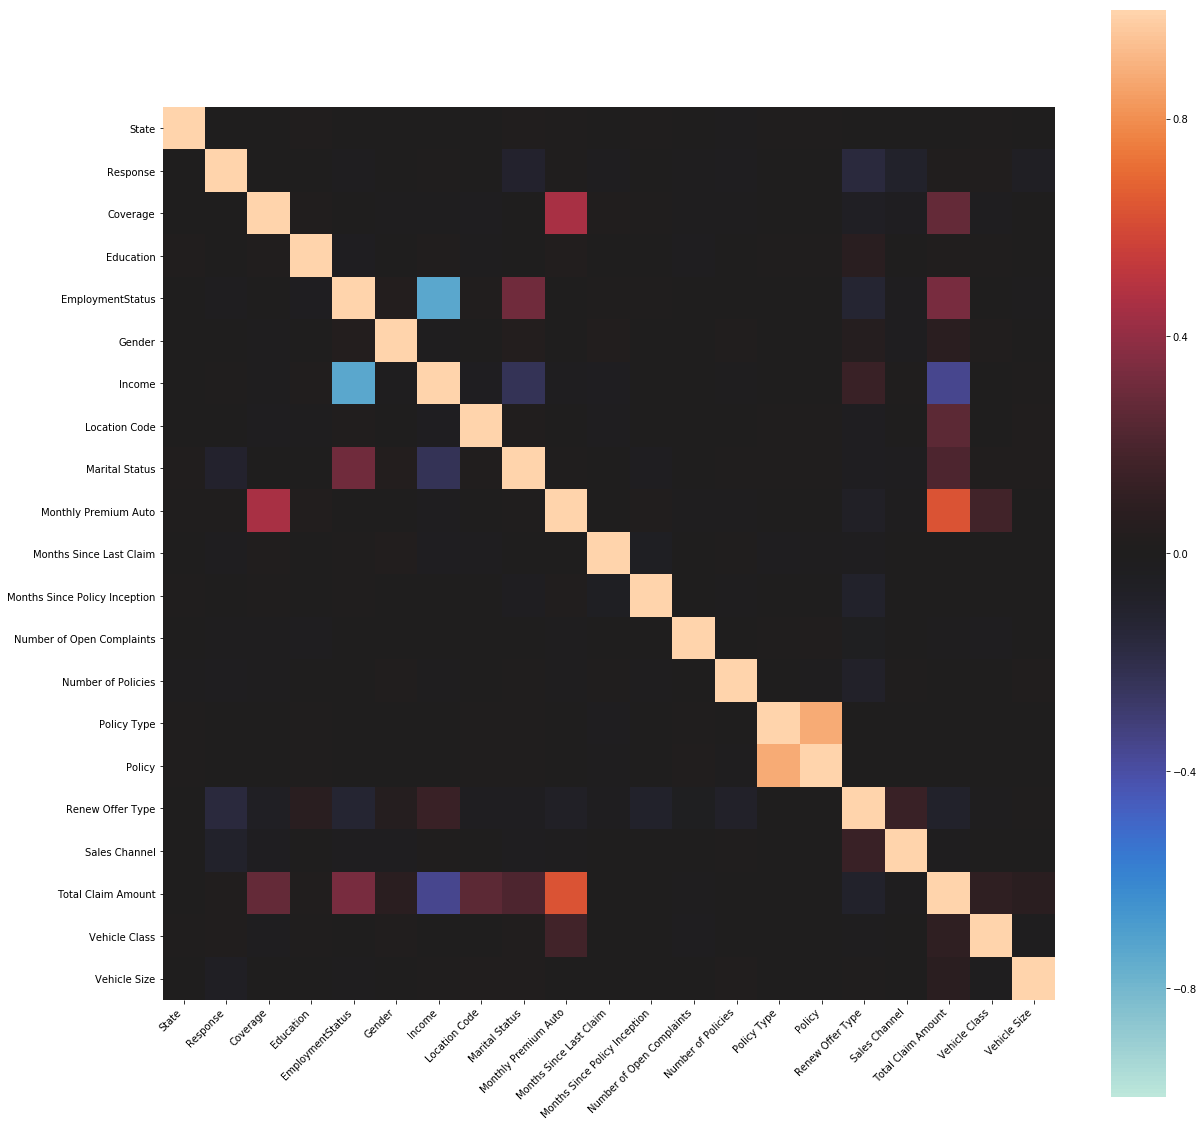

In [ ]:
corr = p.corr()
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [ ]:
data[data['Response'] == 0]['Customer Lifetime Value'].mean()

8030.022304870696

In [ ]:
data[data['Response'] == 1]['Customer Lifetime Value'].mean()

7854.871361325684

In [ ]:
data[data['Response'] == 0]['Customer Lifetime Value'].std()

6968.569280048796

In [ ]:
data[data['Response'] == 1]['Customer Lifetime Value'].std()

6255.638228581915

In [ ]:
p.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1.00,0.0,0.0,0.0,0.25,0.0,0.562847,0.5,0.5,0.033755,...,0.050505,0.0,0.000,0.0,0.250,0.000000,0.000000,0.132974,1.0,0.5
1,0.00,0.0,0.5,0.0,1.00,0.0,0.000000,0.5,1.0,0.139241,...,0.424242,0.0,0.875,0.5,0.625,0.666667,0.000000,0.391051,0.0,0.5
2,0.50,0.0,1.0,0.0,0.25,0.0,0.487763,0.5,0.5,0.198312,...,0.383838,0.0,0.125,0.5,0.625,0.000000,0.000000,0.195764,1.0,0.5
3,0.25,0.0,0.0,0.0,1.00,1.0,0.000000,0.5,0.5,0.189873,...,0.656566,0.0,0.750,0.0,0.125,0.000000,0.666667,0.183117,0.6,0.5
4,1.00,0.0,0.0,0.0,0.25,1.0,0.438443,0.0,1.0,0.050633,...,0.444444,0.0,0.000,0.5,0.375,0.000000,0.000000,0.047710,0.0,0.5


In [ ]:
data[data['Location Code'] == 2]['Customer Lifetime Value'].mean()

8004.457414978725

In [ ]:
del p['Number of Open Complaints']
del p['Education']
del p['EmploymentStatus']
del p['Vehicle Size']
del p['Policy']

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=42)
for train_index,test_index in split.split(p,p['Response']):
    p_train, p_test = p.loc[train_index],p.loc[test_index]
    q_train, q_test = q.loc[train_index], q.loc[test_index]

In [ ]:
p_train['Monthly Premium Auto']= np.sqrt(p_train['Monthly Premium Auto'])
p_test['Monthly Premium Auto']= np.sqrt(p_test['Monthly Premium Auto'])
p_train['Monthly Premium Auto'].skew()

0.6044979278115128

In [ ]:
p_train['Total Claim Amount']= np.sqrt(p_train['Total Claim Amount'])
p_test['Total Claim Amount']= np.sqrt(p_test['Total Claim Amount'])
p_train['Total Claim Amount'].skew()

0.17483040150559556

In [ ]:
#to remove outliers
q_train = np.log10(q_train)
q_test = np.log10(q_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(normalize=True)
regressor.fit(p_train, q_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
regressor.coef_

array([-3.56144104e-04, -1.90529245e-02, -2.54615477e-02, -4.41930257e-03,
        5.08862203e-02,  6.59445017e-04, -2.64977674e-02,  7.04742511e-01,
        1.16568972e-02,  1.85350569e-01,  1.48541469e-02, -4.65809152e-02,
       -3.20522704e-03,  2.07817890e-02,  9.37056681e-03])

In [ ]:
regressor.intercept_

3.5280814024582448

In [ ]:
regressor.score(p,q)

-1.356207797199855

In [ ]:
regressor.score(p_test,q_test)

0.273965776572449

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor(random_state=0)
regressor1.fit(p_train,q_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [ ]:
regressor1.score(p,q)

-1.356149567634651

In [ ]:
regressor1.score(p_test,q_test)

0.49483517321114967

In [ ]:
regressor2.score(p_test,q_test)

0.6941366292860378

In [ ]:
import time
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

In [ ]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(p_train, q_train)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(p_train, q_train)
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)


SVR complexity and bandwidth selected and model fitted in 123.189 s
KRR complexity and bandwidth selected and model fitted in 206.387 s


In [ ]:
kr.score(p_test,q_test)

0.37016818940469065

In [ ]:
svr.score(p_test,q_test)

0.07488382536458728

In [ ]:
from sklearn.ensemble import BaggingRegressor
model1=BaggingRegressor(base_estimator=regressor1,n_estimators=1000,random_state=42)
model1.fit(p_train,q_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [ ]:
model1.score(p,q)

-1.356149536820292

In [ ]:
model1.score(p_test,q_test)

0.9070865741932984

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model2=GradientBoostingRegressor(n_estimators=500,random_state=42)
model2.fit(p_train,q_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
model2.score(p,q)

-1.3561564389029135

In [ ]:
model2.score(p_test,q_test)

0.90123710479277

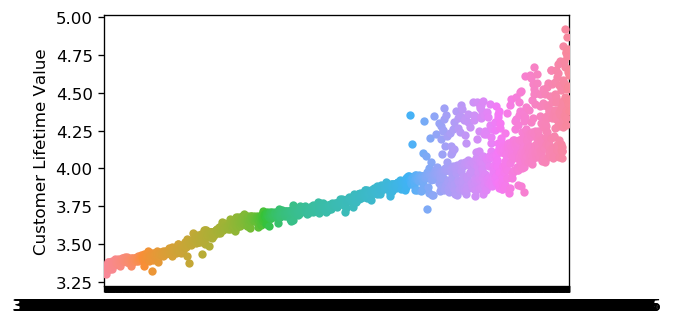

In [ ]:
sns.swarmplot(model1.predict(p_test),q_test)

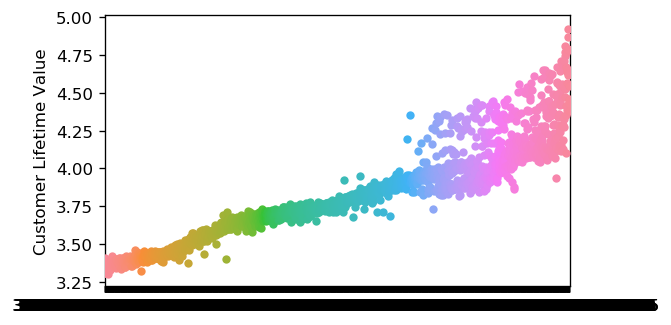

In [ ]:
sns.swarmplot(model2.predict(p_test),q_test)

In [ ]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(p_train, q_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.1min
E:\laptop softwares\anoconda\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 27.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy




In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(p_train, q_train)
base_accuracy = evaluate(base_model, p_test, q_test)

Model Performance
Average Error: 0.0430 degrees.
Accuracy = 98.95%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, p_test, q_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0428 degrees.
Accuracy = 98.96%.
Improvement of 0.01%.


In [ ]:
best_random.score(p_test,q_test)

0.9077661701107307

In [ ]:
base_model.score(p_test,q_test)

0.8981851966918606

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 12.1min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, p_test,q_test)

Model Performance
Average Error: 1890.3015 degrees.
Accuracy = 83.21%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -6.19%.


In [ ]:
mean_absolute_percentage_error(q_test,best_grid.predict(p_test))

16.792292575887235

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(best_random.predict(p_train),q_train))
rmse_test = np.sqrt(mean_squared_error(best_random.predict(p_test),q_test))

In [ ]:
# Calculate Training and Test Accuracy
training_accuracy = best_random.score(p_train, q_train)
test_accuracy = best_random.score(p_test, q_test)

print("Training Accuracy = %0.3f, Test Accuracy = %0.3f, RMSE (train) = %0.3f, RMSE (test) = %0.3f" % (training_accuracy, test_accuracy, rmse_train, rmse_test))


Training Accuracy = 0.962, Test Accuracy = 0.908, RMSE (train) = 2469.559, RMSE (test) = 4099.724


In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(p_train, y_train)
base_accuracy = evaluate(base_model, p_test, y_test)

Model Performance
Average Error: 0.0430 degrees.
Accuracy = 98.95%.


In [ ]:
base_model.score(p_test,y_test)

0.8981851966918606

In [ ]:
pd.DataFrame(np.round(np.power(10,np.column_stack((base_model.predict(p_test),q_test))), decimals=0).astype(int)).head(20)

,0,1
0,3455,3268
1,5333,5332
2,3123,3141
3,3847,3875
4,5473,5607
5,4682,4523
6,4733,4692
7,3753,3747
8,19994,13168
9,2563,2652


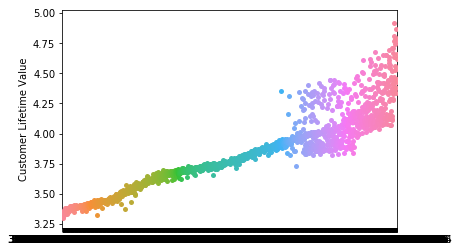

In [ ]:
sns.swarmplot(best_random.predict(p_test),q_test)

# MAPE(mean-absolute percentage error)

In [ ]:
from sklearn import metrics
def  mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred = np.array(y_true) , np.array(y_pred)
    return np.power(10,np.mean(np.abs((y_true-y_pred)/y_true))*100)

In [ ]:
mean_absolute_percentage_error(q_test,best_random.predict(p_test))

11.049014053392435

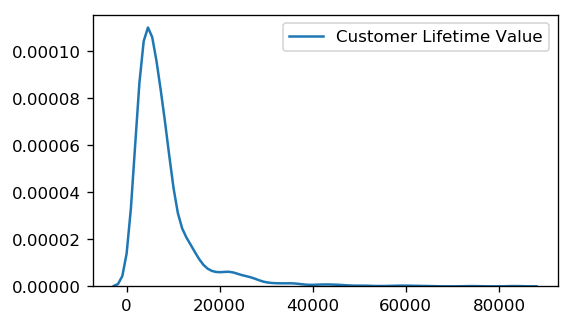

In [ ]:
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})
sns.kdeplot(np.power(10,q_test))


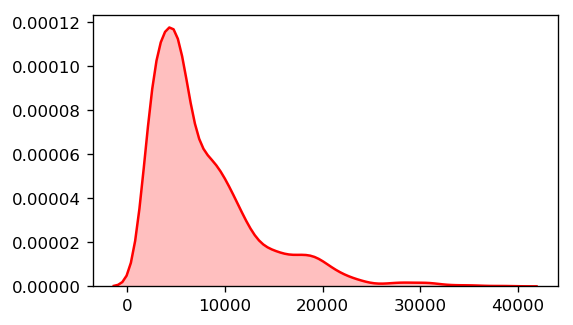

In [ ]:
sns.kdeplot(np.power(10,best_random.predict(p_test)),shade=True, color="r")

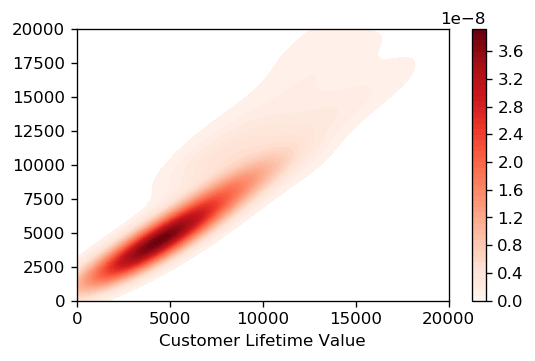

In [ ]:
ax = sns.kdeplot(np.power(10,q_test), np.power(10,best_random.predict(p_test)), n_levels=50, cmap="Reds", shade=True, shade_lowest= False,clip = (0,20000),cbar= True)